In [1]:
# Libraries

import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt


In [2]:
# Importing our dataset

df = pd.read_csv("new_data_def/puerto_rico.csv")

X = df.iloc[:, 0].values
y = df.iloc[:, 4].values

for i, values in enumerate(X):
    X[i] = (time.mktime(datetime.datetime.strptime(values, "%Y-%m-%d").timetuple()) - 1453849200.0)/86400
    
X = X.reshape(-1, 1)
    
print(X[0:5])

    

[[0.0]
 [8.0]
 [14.0]
 [22.0]
 [28.0]]


In [3]:
# Model Fitting

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [4]:
# Predicting the Results
y_pred = lin_reg.predict(X_poly)

In [5]:
# Checking the predictions
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,15.0,278.606024
1,15.0,366.004169
2,21.0,429.928682
3,50.0,512.995908
4,88.0,573.672232
...,...,...
84,0.0,-1037.030227
85,0.0,-1142.861477
86,0.0,-1250.587505
87,0.0,-1360.208310


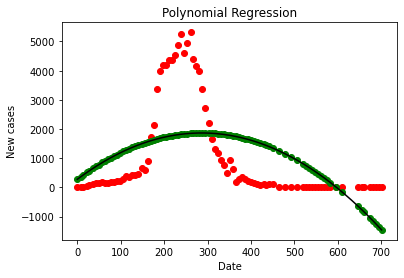

In [6]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show()